In [1]:
import astropy.io.fits as fits
import numpy as np
from photutils import aperture_photometry
from photutils import CircularAperture
from matplotlib import pyplot as plt

In [2]:
### load files
sky = fits.getdata("master_sky.fits")
sci_target = fits.getdata("acq.fits")

In [3]:
### get some relevant information
readnoise = 68. #electrons per read from Readoise.py
gain = 4. # e-/DN
t = 30. # total integration time

ZeroDivisionError: float division

Exception ZeroDivisionError: 'float division' in 'photutils.geometry.core.area_arc' ignored


ZeroDivisionError: float division

Exception ZeroDivisionError: 'float division' in 'photutils.geometry.core.area_arc' ignored


ZeroDivisionError: float division

Exception ZeroDivisionError: 'float division' in 'photutils.geometry.core.area_arc' ignored


ZeroDivisionError: float division

Exception ZeroDivisionError: 'float division' in 'photutils.geometry.core.area_arc' ignored


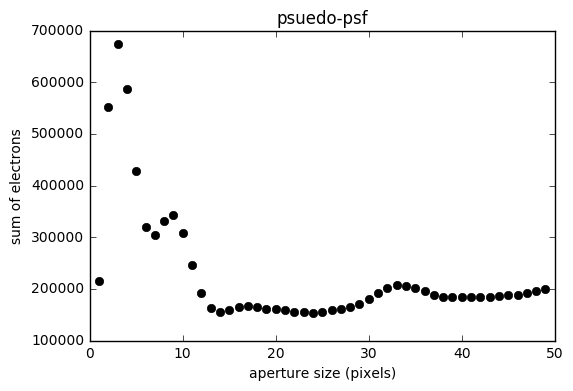

In [15]:
## define aperture centre
positions = [(457., 549.)] ### determined by visual inspection of the image


####   plot psuedo-psf #####
for i in range(1,50):
    aperture = CircularAperture(positions, r=i)
    previous_aperture = CircularAperture(positions, r=i-1)
    phot_table = aperture_photometry(sci_target, aperture)
    previous_phot_table = aperture_photometry(sci_target, previous_aperture)
    
    plt.plot(i, (phot_table['aperture_sum'] - previous_phot_table["aperture_sum"])*gain, "ko")

plt.xlabel("aperture size (pixels)")
plt.ylabel("sum of electrons")
plt.title("psuedo-psf")
plt.show()


We can see from the psuedo-psf plot that most of the target's light is contained within a 10 pixel radius. So we set our aperture radius to be 10 pixels. 

In [22]:
### photometry on science target

pixrad = 10.  ### determined from the psuedo-psf
numpix = np.pi*pixrad**2  ##approx number of pixels in the aperture
print "numpix: ", numpix
print "__________________________________________________"


aperture = CircularAperture(positions, r=pixrad)
phot_table = aperture_photometry(sci_target, aperture)
phot_table['aperture_sum'].info.format = '%.8g'  # for consistent table output
print(phot_table)

print "__________________________________________________"

S = phot_table["aperture_sum"]*gain/t ## signal in e-/sec
print "Target signal in e-/s: ", np.int(S)

numpix:  314.159265359
__________________________________________________
 id xcenter ycenter aperture_sum
      pix     pix               
--- ------- ------- ------------
  1   457.0   549.0    1015644.9
__________________________________________________
Target signal in e-/s:  135419


In [23]:
### photometry on corresponding sky background

aperture = CircularAperture(positions, r=pixrad)
phot_table = aperture_photometry(sky, aperture)
phot_table['aperture_sum'].info.format = '%.8g'  # for consistent table output
print(phot_table)

print "__________________________________________________"

B = phot_table["aperture_sum"]*gain/t ## background sky in e-/sec
print "Sky signal in e-/s: ", np.int(B)

 id xcenter ycenter aperture_sum
      pix     pix               
--- ------- ------- ------------
  1   457.0   549.0    40532.929
__________________________________________________
Sky signal in e-/s:  5404


In [25]:
#### calculate SNR assuming "good calibration", i.e. noise from dark current is negligible

signal = S 
noise = np.sqrt(S + numpix* (S + B + ((readnoise**2)/t)))/np.sqrt(t)
SNR = signal/noise

print "Signal (e-/s): ", np.int(signal)
print "Noise (e-/s): ", np.int(noise)
print "Approximate SNR: ", np.int(SNR)


Signal (e-/s):  135419
Noise (e-/s):  1216
Approximate SNR:  111
